<a href="https://colab.research.google.com/github/Deep1209G/Another-Folder/blob/main/Major_project_for_opening_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:


# Data Collection

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense
import xgboost as xgb

# Load dataset
file_path = '/content/Nifty-50 2020-25.csv'
df = pd.read_csv(file_path)

In [ ]:
# Clean column names
df.columns = df.columns.str.strip()

In [ ]:
# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d-%b-%y')

In [ ]:
# Sort by Date
df.sort_values('Date', inplace=True)
df.reset_index(drop=True, inplace=True)

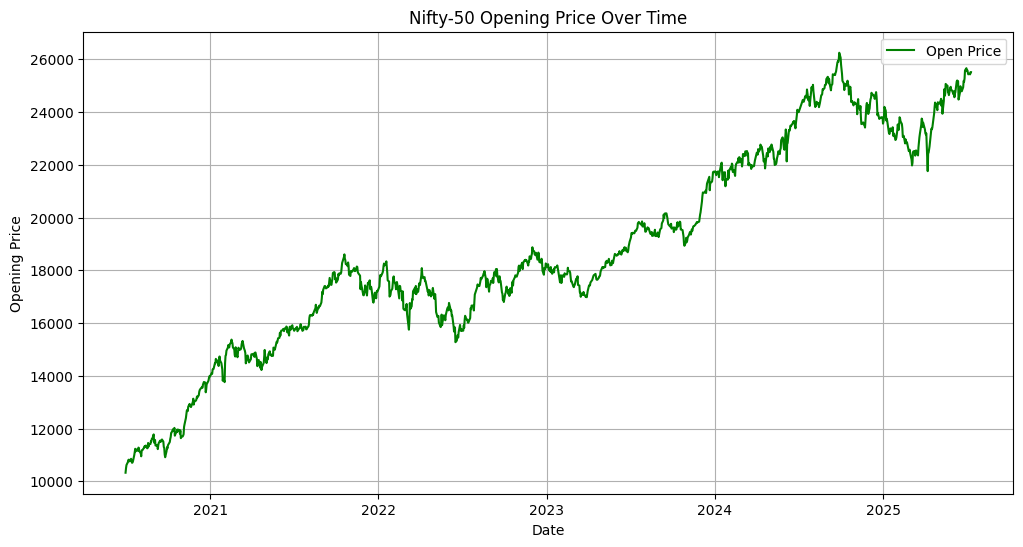

In [ ]:
# Plot Open Price over time
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Open'], label='Open Price', color='green')
plt.title('Nifty-50 Opening Price Over Time')
plt.xlabel('Date')
plt.ylabel('Opening Price')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
print("Dataset Shape:", df.shape)

Dataset Shape: (1247, 7)


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1247 entries, 0 to 1246
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             1247 non-null   datetime64[ns]
 1   Open             1247 non-null   float64       
 2   High             1247 non-null   float64       
 3   Low              1247 non-null   float64       
 4   Close            1247 non-null   float64       
 5   Shares Traded    1247 non-null   int64         
 6   Turnover (? Cr)  1247 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 68.3 KB
None


In [ ]:
print("Missing values:\n", df.isnull().sum())

Missing values:
 Date               0
Open               0
High               0
Low                0
Close              0
Shares Traded      0
Turnover (? Cr)    0
dtype: int64


In [ ]:
print("Duplicate rows:", df.duplicated().sum())

Duplicate rows: 2


In [ ]:
# Remove duplicates if any
df = df.drop_duplicates()

In [ ]:
# Data Preprocessing

# Select Open column
data = df[['Open']]

# Normalize values (0-1 scaling)
scaler = MinMaxScaler(feature_range=(0, 1))
normalized_data = scaler.fit_transform(data)

# Function to create sequences
def create_dataset(dataset, time_step=60):
    X, Y = [], []
    for i in range(len(dataset) - time_step - 1):
        X.append(dataset[i:(i + time_step), 0])
        Y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(Y)

time_step = 60
X, y = create_dataset(normalized_data, time_step)

# Reshape input for LSTM/GRU: (samples, timesteps, features)
X = X.reshape(X.shape[0], X.shape[1], 1)

print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")


Shape of X: (1184, 60, 1)
Shape of y: (1184,)


In [ ]:
# 3. Train-Test Split (80-20, sequential)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

print("Training set:", X_train.shape, y_train.shape)
print("Testing set:", X_test.shape, y_test.shape)

Training set: (947, 60, 1) (947,)
Testing set: (237, 60, 1) (237,)



Training LSTM Model...
Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0975
Epoch 2/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0020
Epoch 3/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 6.6780e-04
Epoch 4/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 5.7285e-04
Epoch 5/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 6.0140e-04
Epoch 6/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 5.8843e-04
Epoch 7/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 5.6182e-04
Epoch 8/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 5.8551e-04
Epoch 9/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 5.8447e-04
Epoch 10/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 5.4807e-04

Training GRU Model...
Epoch 1/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0775
Epoch 2/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0031
Epoch 3/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 3.8518e-04
Epoch 4/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 2.5429e-04
Epoch 5/10
37/37 ━━━━━━

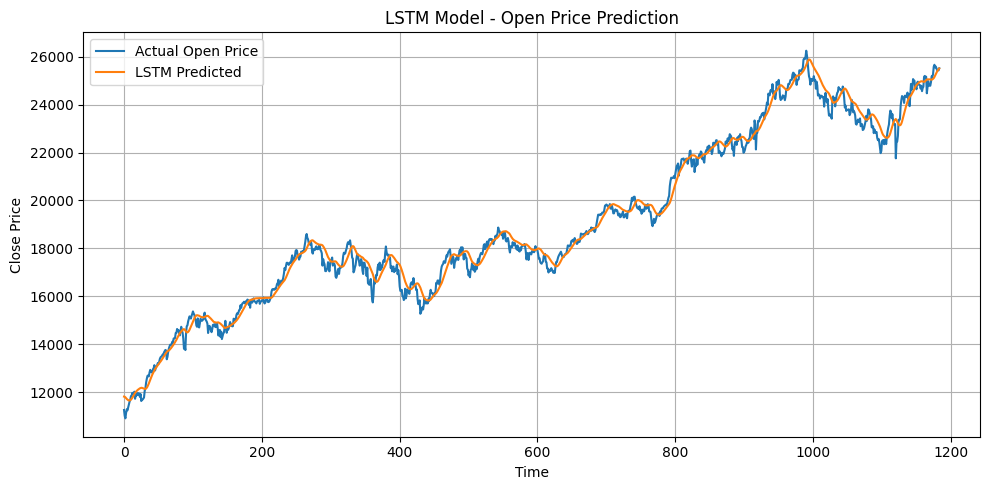

37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


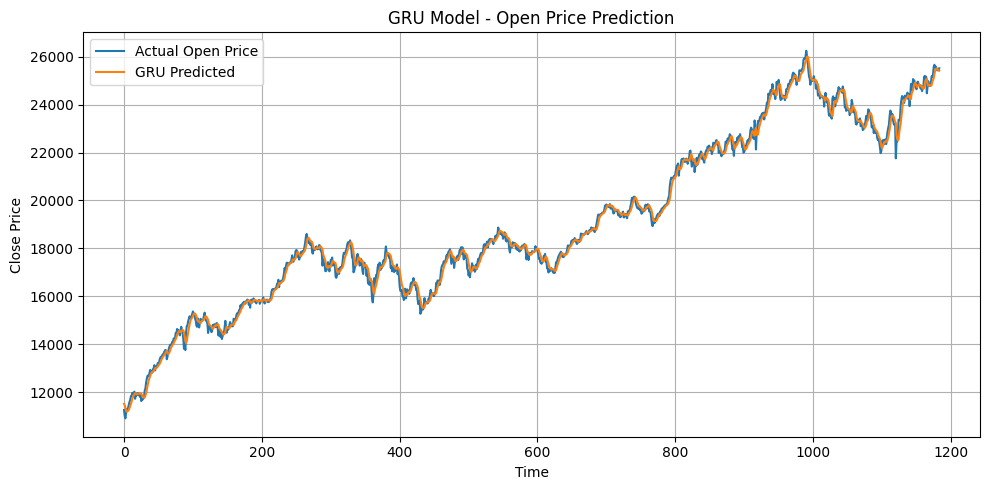

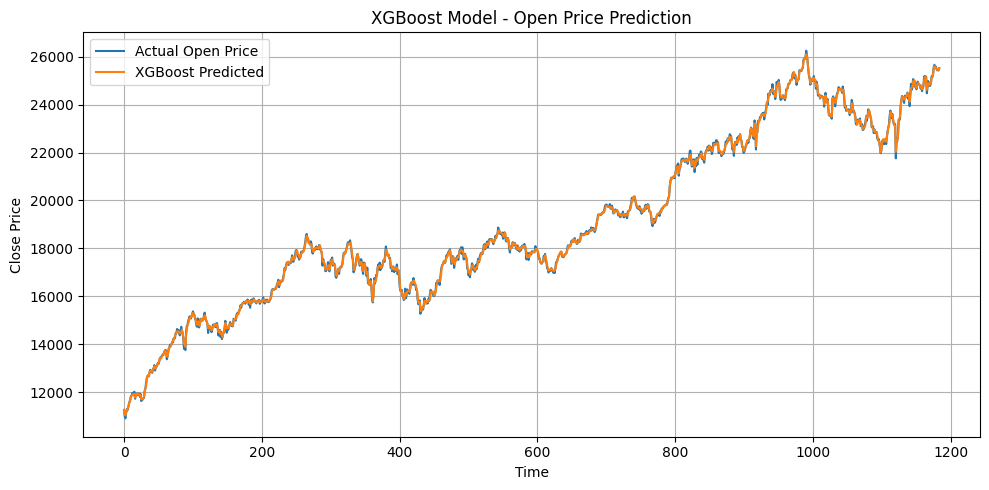

In [ ]:
# 4. LSTM Model
print("\nTraining LSTM Model...")
model_lstm = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X.shape[1], 1)),
    LSTM(50),
    Dense(1)
])
model_lstm.compile(optimizer='adam', loss='mean_squared_error')
model_lstm.fit(X, y, epochs=10, batch_size=32)

# 5. GRU Model
print("\nTraining GRU Model...")
model_gru = Sequential([
    GRU(50, return_sequences=True, input_shape=(X.shape[1], 1)),
    GRU(50),
    Dense(1)
])
model_gru.compile(optimizer='adam', loss='mean_squared_error')
model_gru.fit(X, y, epochs=10, batch_size=32)

# 6. XGBoost Model

print("\nTraining XGBoost Model...")

# Define model
model_xgb = xgb.XGBRegressor(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

# Train the XGBoost model
model_xgb.fit(X.squeeze(), y)  # XGBoost expects 2D input, so squeeze the features

# 7. Prediction Function

def plot_predictions(model, X_input, y_actual, name):
    if name == "XGBoost":
        pred = model.predict(X_input)
        pred = pred.reshape(-1, 1)
    else:  # For LSTM and GRU
        pred = model.predict(X_input)

    # Inverse transform predictions and actual values
    pred_inv = scaler.inverse_transform(pred)
    actual_inv = scaler.inverse_transform(y_actual.reshape(-1, 1))

    # Plot results
    plt.figure(figsize=(10, 5))
    plt.plot(actual_inv, label='Actual Open Price')
    plt.plot(pred_inv, label=f'{name} Predicted')
    plt.title(f'{name} Model - Open Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('Close Price')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# 8. Evaluation Function
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def evaluate_model(model, X_input, y_actual, name):
    if name == "XGBoost":
        pred = model.predict(X_input)
        pred = pred.reshape(-1, 1)
    else:  # For LSTM and GRU
        pred = model.predict(X_input)

    # Inverse transform predictions and actual values
    pred_inv = scaler.inverse_transform(pred)
    actual_inv = scaler.inverse_transform(y_actual.reshape(-1, 1))

    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(actual_inv, pred_inv))
    mae = mean_absolute_error(actual_inv, pred_inv)
    r2 = r2_score(actual_inv, pred_inv)

    # Print evaluation
    print(f"\n{name} Evaluation:")
    print(f"  RMSE: {rmse:.4f}")
    print(f"  MAE:  {mae:.4f}")
    print(f"  R²:   {r2:.4f}")

# 9. Run Evaluation & Plotting

# Evaluate models
evaluate_model(model_lstm, X, y, "LSTM")
evaluate_model(model_gru, X, y, "GRU")
evaluate_model(model_xgb, X.squeeze(), y, "XGBoost")  # XGBoost expects 2D input

# Plot predictions
plot_predictions(model_lstm, X, y, "LSTM")
plot_predictions(model_gru, X, y, "GRU")
plot_predictions(model_xgb, X.squeeze(), y, "XGBoost")